## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

### Importing train and test data

In [2]:
train = pd.read_csv("Final_train_data.csv")
test = pd.read_csv("Final_test_data.csv")

## Feature Selection

In [3]:
## Assigning Dependant and independent variables

train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_Month', 'Depature_Hour',
       'Depature_minutes', 'Arrival_Hour', 'Arrival_minutes',
       'Duration in mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi.1', 'Hyderabad', 'Kolkata.1', 'New Delhi'],
      dtype='object')

In [4]:
X = train.loc[:,['Total_Stops', 'Journey_day', 'Journey_Month', 'Depature_Hour',
       'Depature_minutes', 'Arrival_Hour', 'Arrival_minutes',
       'Duration in mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi.1', 'Hyderabad', 'Kolkata.1', 'New Delhi']]

In [5]:
X.head()

,Total_Stops,Journey_day,Journey_Month,Depature_Hour,Depature_minutes,Arrival_Hour,Arrival_minutes,Duration in mins,Air India,GoAir,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi.1,Hyderabad,Kolkata.1,New Delhi
0,0.0,24,3,22,20,1,10,170,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2.0,1,5,5,50,13,15,445,1,0,...,0,0,0,1,0,0,0,0,0,0
2,2.0,9,6,9,25,4,25,1140,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1.0,12,5,18,5,23,30,325,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1.0,1,3,16,50,21,35,285,0,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
y = train.iloc[:,1]

In [7]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10683, dtype: int64

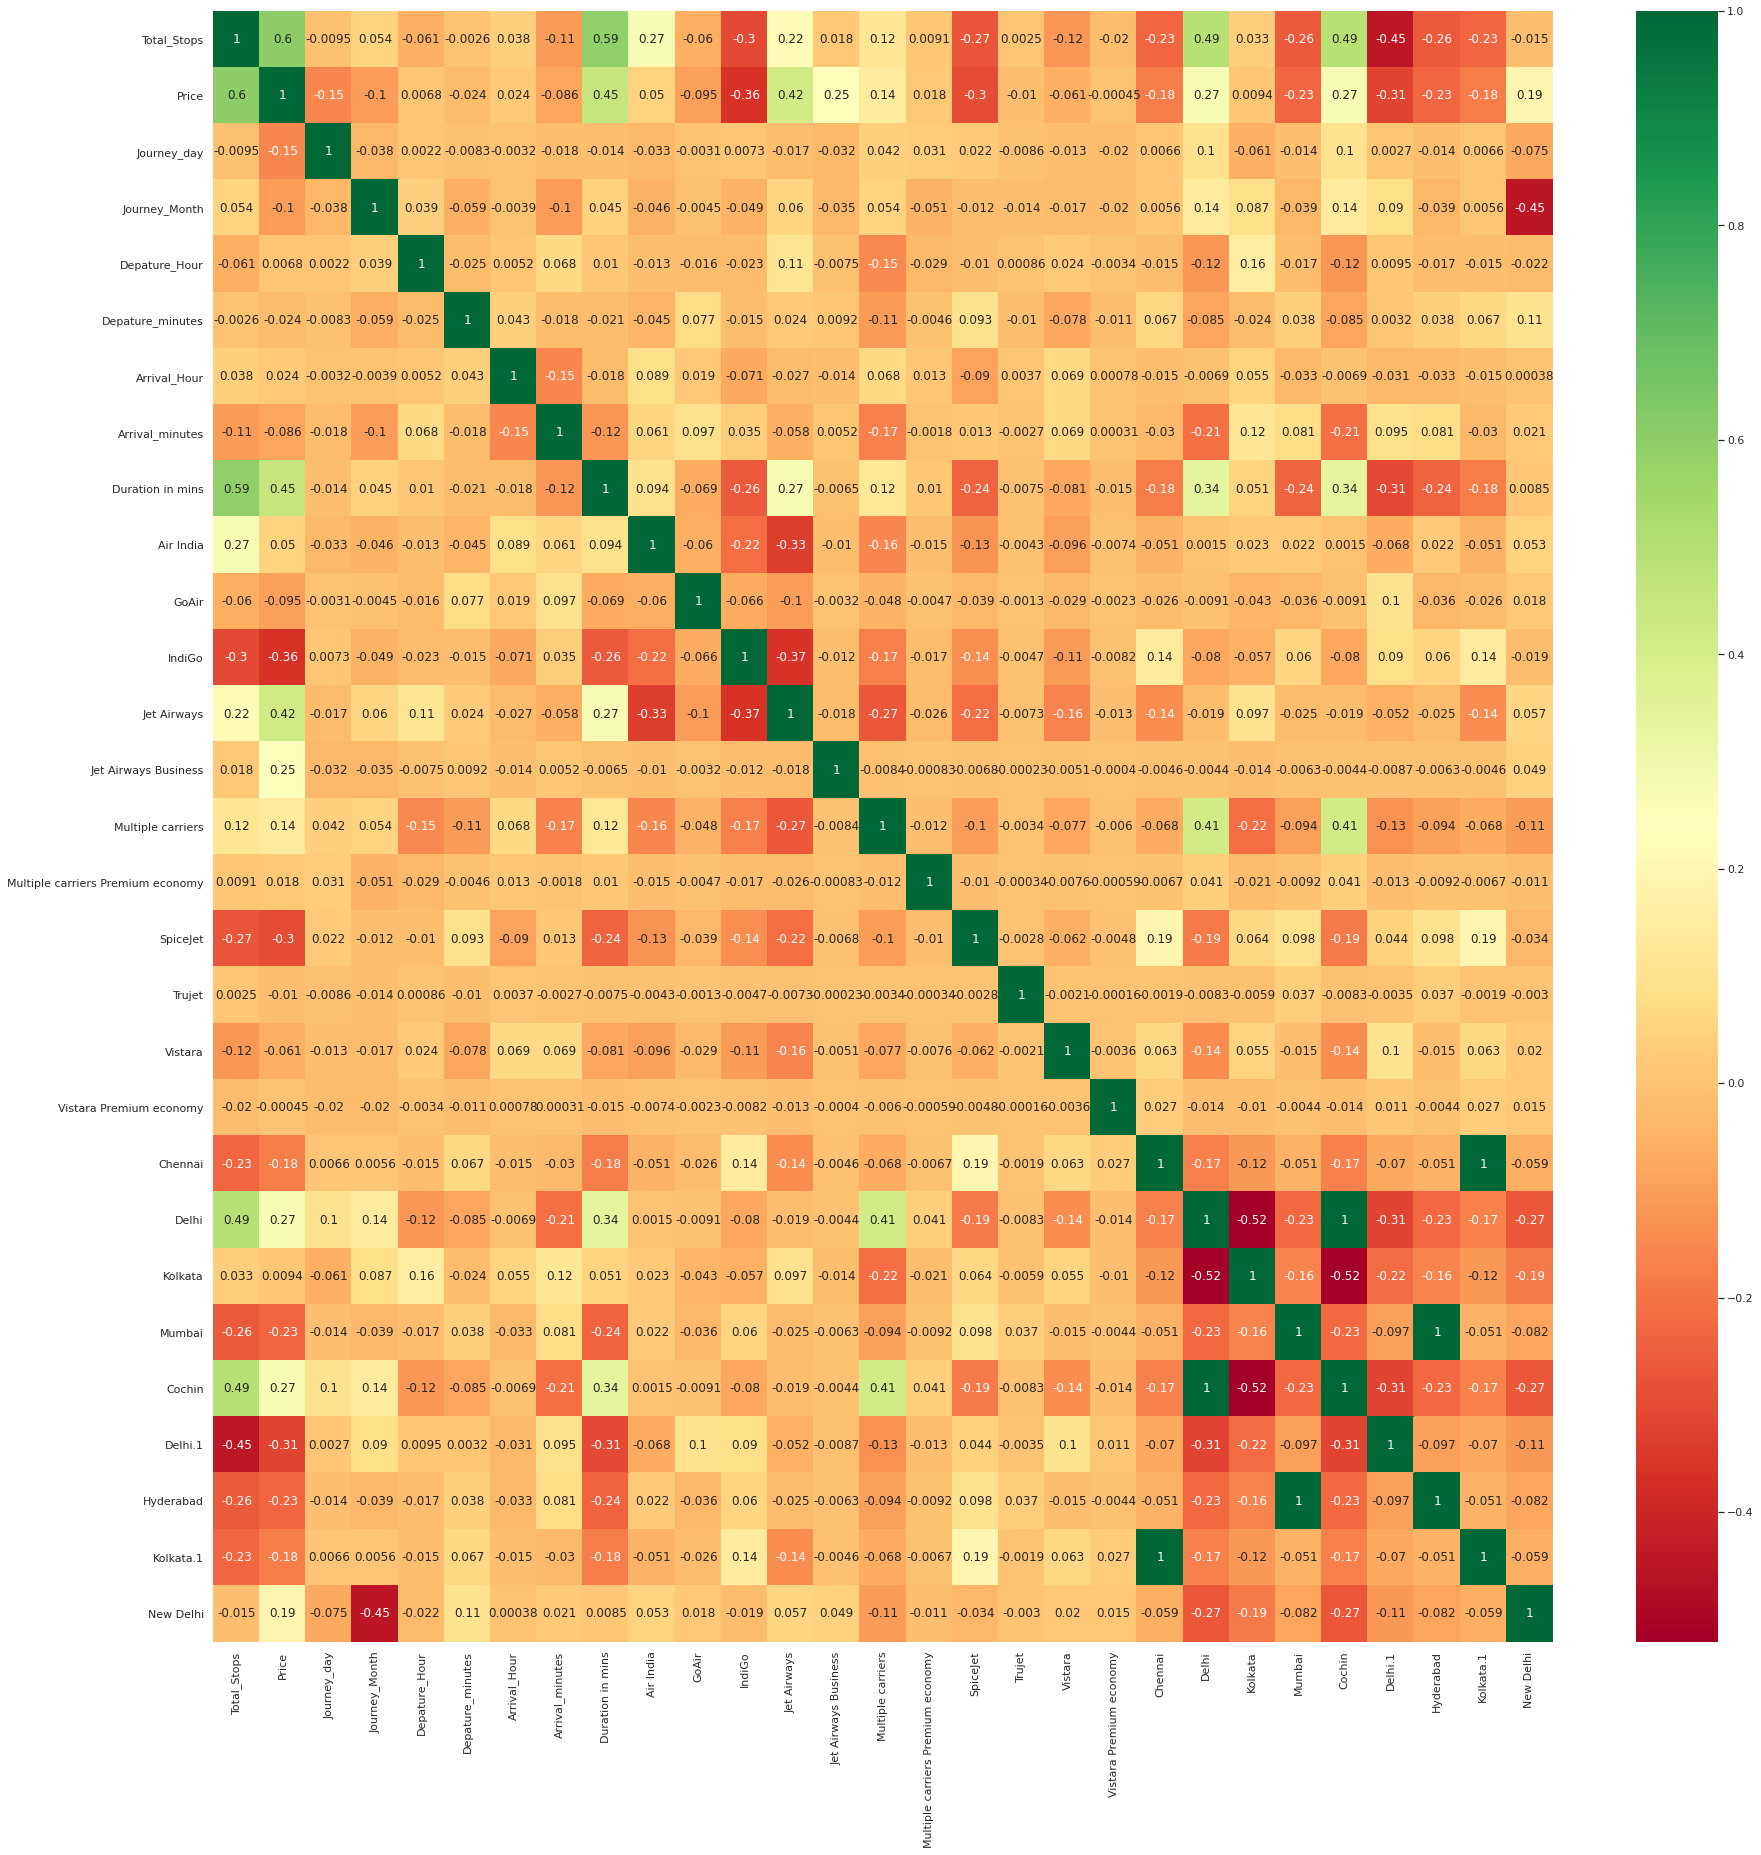

In [8]:
plt.figure(figsize = (30,30))
sns.heatmap(train.corr(), annot = True, cmap = "RdYlGn")

plt.show()

## Fitting model using XGBoost

In [21]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [10]:
model = XGBRegressor()
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 20, test_size = 0.25)

In [11]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

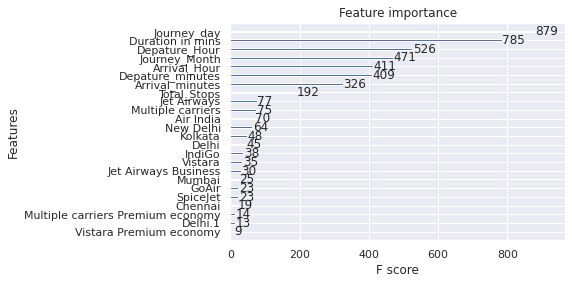

In [12]:
## Checking feature importance using f-score
plot_importance(model)
plt.show()

In [13]:
y_pred = model.predict(X_test)

In [14]:
predictions = [round(value) for value in y_pred]

In [15]:
accuracy = accuracy_score(y_test, predictions)
print('The accuracy score of the model is : {}'.format(accuracy))

The accuracy score of the model is : 0.0007487832272557095


In [16]:
model.score(X_train, y_train)

0.9369717004978964

In [17]:
model.score(X_test, y_test)

0.8137302934026484

/root/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


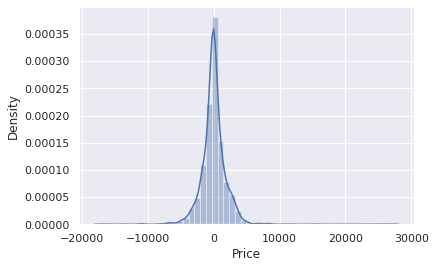

In [18]:
sns.distplot(y_test-y_pred)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

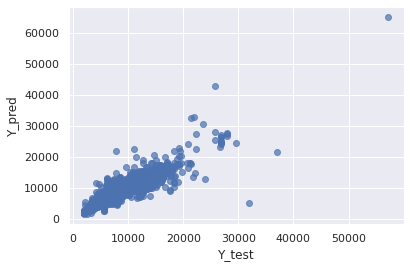

In [19]:
plt.scatter(y_test, y_pred, alpha = 0.7)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.show

In [22]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1225.2114170978507
MSE: 3612626.6757967058
RMSE: 1900.691104781812


In [23]:
metrics.r2_score(y_test, y_pred)

0.8137302934026484

### Hyperparameter Tuning using RandomizedSearchCV

In [24]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score


In [25]:
## Hyper parameter optimization

params = {
     "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] 
}

In [26]:
random_search = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=5,n_jobs=1,cv=5,verbose=3,scoring='neg_mean_absolute_error')

In [27]:
random_search.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] min_child_weight=7, max_depth=12, learning_rate=0.05, gamma=0.1, colsample_bytree=0.3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  min_child_weight=7, max_depth=12, learning_rate=0.05, gamma=0.1, colsample_bytree=0.3, score=-1381.652, total=   1.8s
[CV] min_child_weight=7, max_depth=12, learning_rate=0.05, gamma=0.1, colsample_bytree=0.3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV]  min_child_weight=7, max_depth=12, learning_rate=0.05, gamma=0.1, colsample_bytree=0.3, score=-1370.338, total=   2.1s
[CV] min_child_weight=7, max_depth=12, learning_rate=0.05, gamma=0.1, colsample_bytree=0.3 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.0s remaining:    0.0s


[CV]  min_child_weight=7, max_depth=12, learning_rate=0.05, gamma=0.1, colsample_bytree=0.3, score=-1321.757, total=   1.9s
[CV] min_child_weight=7, max_depth=12, learning_rate=0.05, gamma=0.1, colsample_bytree=0.3 
[CV]  min_child_weight=7, max_depth=12, learning_rate=0.05, gamma=0.1, colsample_bytree=0.3, score=-1343.112, total=   2.0s
[CV] min_child_weight=7, max_depth=12, learning_rate=0.05, gamma=0.1, colsample_bytree=0.3 
[CV]  min_child_weight=7, max_depth=12, learning_rate=0.05, gamma=0.1, colsample_bytree=0.3, score=-1364.067, total=   1.7s
[CV] min_child_weight=1, max_depth=12, learning_rate=0.3, gamma=0.4, colsample_bytree=0.4 
[CV]  min_child_weight=1, max_depth=12, learning_rate=0.3, gamma=0.4, colsample_bytree=0.4, score=-1300.336, total=   1.8s
[CV] min_child_weight=1, max_depth=12, learning_rate=0.3, gamma=0.4, colsample_bytree=0.4 
[CV]  min_child_weight=1, max_depth=12, learning_rate=0.3, gamma=0.4, colsample_bytree=0.4, score=-1309.273, total=   2.2s
[CV] min_child_w

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  1.5min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=0,
                                          num_par...
                                          reg_alpha=0, reg_lambda=1,
                                          scale_pos_weight=1, subsample=1,
   

In [28]:
random_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=12,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 12,
 'learning_rate': 0.1,
 'gamma': 0.0,
 'colsample_bytree': 0.5}

In [30]:
random_prediction = random_search.predict(X_test)

/root/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


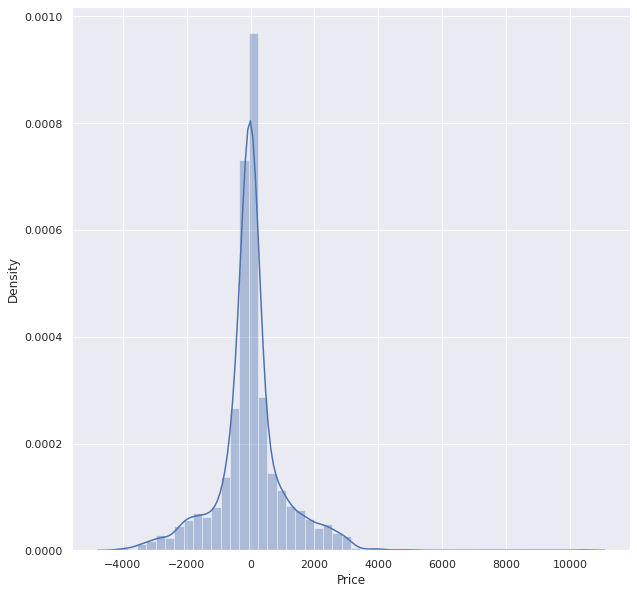

In [31]:
plt.figure(figsize=(10,10))
sns.distplot(y_test-random_prediction)
plt.show()

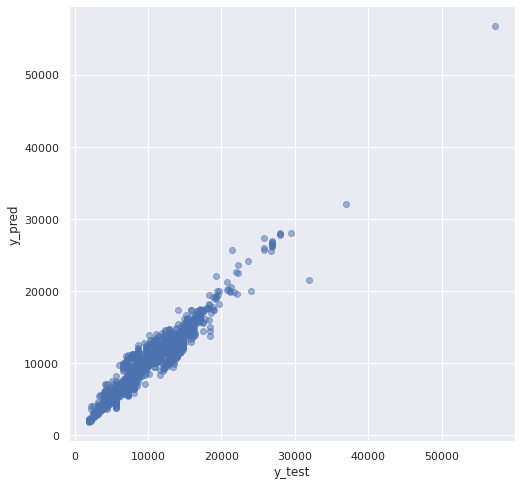

In [32]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, random_prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [33]:
metrics.r2_score(y_test, random_prediction)

0.9423724740801538

## Saving the model to reuse

In [37]:
import pickle

file = open("/home/tony/Documents/DataScience/Vignesh/Flight_price_prediction/flight_pickle.pkl", 'wb')
pickle.dump(random_search, file)


In [38]:
final = open("/home/tony/Documents/DataScience/Vignesh/Flight_price_prediction/flight_pickle.pkl", 'rb')
boost = pickle.load(final)

In [39]:
y_prediction = boost.predict(X_test)

In [40]:
metrics.r2_score(y_test, y_prediction)

0.9423724740801538